In [1]:
import numpy as np
import pandas as pd

In [2]:
print( pd.__version__)

2.0.2


# What are missing values?

In pandas, missing values refer to the absence or undefined values in a dataset. Missing values can occur when data is not available, not recorded, or when there are data entry errors. Pandas provides specific representations for missing values in different data types to facilitate data analysis and handling.

The common representations for missing values in Pandas are as follows:

`NaN` (Not a Number): It is the default representation for missing ***numerical*** values and is of the float data type.

`None`: It is the default representation for missing ***non-numeric*** (e.g., object) values. It is a Python object and is typically used when the data type of a column is explicitly set as `object`.

`NaT` (Not-a-Time): It is used to represent missing values in ***datetime-like*** columns. `NaT` is specific to datetime data types and is treated as a special value.

Pandas provides various methods and functions to detect, handle, and manipulate missing values, including functions like `isna()`, `notna()`, `dropna()`, `fillna()`, and more. These functions allow for identifying missing values, removing or replacing them, and performing calculations and analysis while accounting for missing values.

It is essential to consider missing values during data analysis and handle them appropriately to ensure accurate and meaningful results.


###### Generate a DataFrame with missing values:

In [3]:
index = pd.Series(data = ["Tom", "Bob", "Mary", "James", "Andy", "Alice"], name = "name")
data = {
    "age": [18, 30, None, 40, np.nan, 30],
    "city": ["New Yok", "Los Angeles", pd.NA, "Seattle", "Chicago", "Huston"],
    "sex": [None, "male", "female", "male", np.nan, "unknown"],
    "birth": ["2000-02-10", "2001-12-12", None, "1978-08-08", pd.NaT, "1988-10-17"]
}
user_info = pd.DataFrame(data = data, index = index)
user_info

,age,city,sex,birth
name,,,,
Tom,18.0,New Yok,None,2000-02-10
Bob,30.0,Los Angeles,male,2001-12-12
Mary,NaN,<NA>,female,None
James,40.0,Seattle,male,1978-08-08
Andy,NaN,Chicago,NaN,NaT
Alice,30.0,Huston,unknown,1988-10-17


In [4]:
user_info.dtypes

age      float64
city      object
sex       object
birth     object
dtype: object

## Check for missing values

###### check for missing values in a DataFrame or Series, there are two common methods available:

* `isna()` and `notna()`: These methods return a Boolean mask indicating which elements are missing (`NaN`) and which are not. The `isna()` method returns `True` for missing values and `False` for non-missing values, while `notna()` does the opposite.

* `isnull()` and `notnull()`: These methods are aliases for `isna()` and `notna()`, respectively. They provide the same functionality to check for missing values in a DataFrame or Series.

In [5]:
user_info.isna()

,age,city,sex,birth
name,,,,
Tom,False,False,True,False
Bob,False,False,False,False
Mary,True,True,False,True
James,False,False,False,False
Andy,True,False,True,True
Alice,False,False,False,False


In [6]:
user_info.isnull()

,age,city,sex,birth
name,,,,
Tom,False,False,True,False
Bob,False,False,False,False
Mary,True,True,False,True
James,False,False,False,False
Andy,True,False,True,True
Alice,False,False,False,False


In [7]:
pd.isna, pd.isnull

(<function pandas.core.dtypes.missing.isna(obj: 'object') -> 'bool | npt.NDArray[np.bool_] | NDFrame'>,
 <function pandas.core.dtypes.missing.isna(obj: 'object') -> 'bool | npt.NDArray[np.bool_] | NDFrame'>)

From the printed results above, it can be observed that except for empty strings, `None`, `np.nan`, `pd.NA`, and `pd.NAT` are all considered as missing values. What are the differences between these types of missing values?

In pandas, there are several common ways to represent missing values:

`None`: None is a special object in Python used to represent missing values. In pandas, None is automatically converted to NaN (Not a Number).

`np.nan`: np.nan is a special value in the NumPy library and is also used to represent missing values. It is a floating-point value that can be used to represent missing values of any data type.

`pd.NA`: `pd.NA` is a newer addition to pandas and stands for missing values at the object level. It is a scalar value that represents missing values for object-dtype columns. `pd.NA` is designed to provide better compatibility with nullable integer and boolean data types.

`pd.NAT`: `pd.NAT` is another addition to pandas and represents missing values at the datetime-like level. It is used to represent missing values in datetime-like columns, such as datetime or timedelta.

## Types of missing values

### None
In pandas, `None` can be used as a missing value label. It is a Python object that represents missing values. However, it cannot be used as a missing value for `Numpy` or `pandas` array types. Instead, it can only be used for arrays of `object` dtype, which are arrays composed of Python objects.

In [8]:
None == None

True

In [9]:
pd.Series([None], dtype = 'bool')  # None in Bool is False

0    False
dtype: bool

In [10]:
pd.Series([True, None], dtype = 'bool') # The data type of None in Bool typle is Bool. 

0     True
1    False
dtype: bool

In [11]:
pd.Series([1, None]) # when None is with scalars, it automatically converts into a float64

0    1.0
1    NaN
dtype: float64

In [12]:
pd.Series([1, None], dtype = 'O') # Unless setting up the data type to object 

0       1
1    None
dtype: object

None represents missing values in Python data types. In pandas, `None` is only considered as `None` when the Series data type is `object`. For other data types, `None` will be automatically converted to the corresponding data type. For example, in a boolean Series, `None` will be converted to `False`, and in an integer Series, `None` will be converted to `pd.nan`.

It's important to note that the type of `None` may vary depending on the data type and context in which it is used. It is generally recommended to use `NaN` (Not a Number) as the standard representation for missing numerical values in pandas to ensure consistent handling of missing values across different data types.

### NaN (Not a Number)

`NaN` is a specific representation used in pandas and other numerical libraries to indicate missing or undefined values in numeric data types. It is primarily used for numeric or floating-point data types.

In [13]:
np.nan == np.nan 

False

In [14]:
np.nan == 0

False

In [15]:
np.nan == None

False

In [16]:
type(np.nan) 

float

The data type of `np.nan` is floating-point. In NumPy and Pandas, when columns contains integers and have missing values in other rows, integers will be automatically converted to floating-point data type.

In [17]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [18]:
pd.Series([1, np.nan, 3])

0    1.0
1    NaN
2    3.0
dtype: float64

When a Series contains a mix of boolean values and `NaN`, the data type of the Series will be automatically converted to `object`. This is because `object` is a flexible data type that can accommodate both boolean values and `NaN`.

In [19]:
pd.Series([True, False])

0     True
1    False
dtype: bool

In [20]:
pd.Series([True, np.nan, False])

0     True
1      NaN
2    False
dtype: object

If `np.nan` is used to fill missing values in a boolean Series, the values will automatically be changed to `True` instead of `False`.

In [21]:
pd.Series([True, np.nan, False], dtype = 'bool')

0     True
1     True
2    False
dtype: bool

`np.nan` is the representation for missing values in both NumPy and Pandas, and its data type is float. However, it differs from empty values in that it evaluates to `True` when converted to a boolean value. When a Series contains both boolean values and `np.nan`, the resulting data type is converted to `object`. Similarly, when a Series contains both integer values and np.nan, the resulting data type is converted to float64. It's important to note that two `np.nan` values are not equal.

### pd.NaT

`pd.NaT` (Not-a-Time) is the representation for missing values in time series data in pandas. It is a built-in type in pandas specifically designed for representing missing values in datetime-like columns. Similar to `np.nan`, `pd.NaT` is treated as a special value and is not equal to any other value, including itself.

When working with datetime-like columns, if a value is missing or undefined, it will be represented as `pd.NaT`. This allows for consistent handling and manipulation of missing values in time series data.

It's important to note that `pd.NaT` is specific to datetime-like data types and should not be used as a representation for missing values in other types of data.

In [22]:
s_time = pd.Series([pd.Timestamp('20230606')])
s_time

0   2023-06-06
dtype: datetime64[ns]

In [23]:
s_time[1] = None
s_time

0   2023-06-06
1          NaT
dtype: datetime64[ns]

In [24]:
s_time[2] = np.nan
s_time

0   2023-06-06
1          NaT
2          NaT
dtype: datetime64[ns]

In [25]:
s_time[3] = pd.NaT
s_time

0   2023-06-06
1          NaT
2          NaT
3          NaT
dtype: datetime64[ns]

In [26]:
pd.NaT == pd.NaT

False

In [27]:
pd.Series([True, False])

0     True
1    False
dtype: bool

In [28]:
pd.Series([True, pd.NaT, False])

0     True
1      NaT
2    False
dtype: object

In [29]:
pd.Series([True, pd.NaT, False], dtype = 'bool')

0     True
1     True
2    False
dtype: bool

## Nullable type & NA scalar

Experimental NA scalar to denote missing values

Starting from pandas 1.0, an experimental `pd.NA` value (singleton) is available to represent scalar missing values. At this moment, it is used in the nullable integer, boolean and dedicated string data types as the missing value indicator.

The goal of `pd.NA` is provide a “missing” indicator that can be used consistently across data types (instead of `np.nan`, `None` or `pd.NaT` depending on the data type).

For example, when having missing values in a Series with the nullable integer dtype, it will use `pd.NA`.
"
### Nullable Interger
https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html

In [30]:
# the string alias "Int64" (note the capital "I", to differentiate from NumPy’s 'int64' dtype:
pd.Series([1, 2, np.nan, None, pd.NA], dtype ="Int64")

0       1
1       2
2    <NA>
3    <NA>
4    <NA>
dtype: Int64

### Nullable Boolean

In [31]:
pd.Series([True, False, np.nan, None], dtype = "boolean") # type error if put numerical or pd.NaT in the list

0     True
1    False
2     <NA>
3     <NA>
dtype: boolean

### String  

This type, introduced in version 1.0, is a major innovation with the aim of distinguishing itself from the previously ambiguous 'object' type. It is important to briefly mention the string type here, as it is the main topic of later chapter. The string type is essentially a Nullable type as well, meaning that it does not change its type due to the presence of missing values.

The introduction of the string type in pandas provides a more precise and explicit representation of string data, including the ability to handle missing or undefined values. It allows for more consistent handling of string data and facilitates operations and computations involving string columns with missing values.

By introducing the string type, pandas enhances the overall data handling capabilities and ensures a more accurate representation of missing values in string columns.

https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [32]:
pd.Series(["a", "b", "c"])

0    a
1    b
2    c
dtype: object

In [33]:
pd.Series(["a", "b", "c"], dtype = 'string')

0    a
1    b
2    c
dtype: string

In [34]:
pd.Series(["a", "b", "c", np.nan, None, pd.NaT], dtype = 'string')

0       a
1       b
2       c
3    <NA>
4    <NA>
5    <NA>
dtype: string

In [35]:
s = pd.Series(["a", "b", "c"])
s.astype("string")

0    a
1    b
2    c
dtype: string

## Calculations with missing data

* When summing data, `NA` (missing) values will be treated as zero.

* When multiplicating data, `NA` (missing) values will be treated as one.

* If the data are all `NA`, the result will be 0.

* Cumulative methods like `cumsum()` and `cumprod()` ignore `NA` values by default, but preserve them in the resulting arrays. To override this behaviour and include `NA` values, use `skipna = False`.

In [36]:
s = pd.Series([1, 2, 4, np.nan])

In [37]:
s.sum()

7.0

In [38]:
s.prod()

8.0

In [39]:
s.cumsum()

0    1.0
1    3.0
2    7.0
3    NaN
dtype: float64

In [40]:
s.cumprod()

0    1.0
1    2.0
2    8.0
3    NaN
dtype: float64

Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.

In [41]:
s.pct_change()

0    NaN
1    1.0
2    1.0
3    0.0
dtype: float64

In [42]:
s1 = pd.Series([1.1, 3.5, 80, 99.3, np.nan])
s1.pct_change()

0          NaN
1     2.181818
2    21.857143
3     0.241250
4     0.000000
dtype: float64

## Sum/prod of empties/nans

The sum of an empty or all-NA Series or column of a DataFrame is 0.

In [43]:
pd.Series([], dtype = "float64").sum()

0.0

In [44]:
pd.Series([np.nan]).sum()

0.0

The product of an empty or all-NA Series or column of a DataFrame is 1.

In [45]:
pd.Series([np.nan]).prod()

1.0

In [46]:
pd.Series([], dtype="float64").prod()

1.0

## NA values in GroupBy

NA groups in GroupBy are automatically excluded.

In [47]:
data = {
    "one": [np.nan, np.nan, 0.119, -2.104, np.nan],
    "two": np.random.uniform(0, 1, 5),
    "three": np.random.uniform(0, 1, 5)    
}
index = pd.Index(["a", "b", "c","d","e"])
df = pd.DataFrame(data = data, index = index)
df

,one,two,three
a,NaN,0.668623,0.238556
b,NaN,0.515973,0.614538
c,0.119,0.020951,0.224919
d,-2.104,0.185790,0.124396
e,NaN,0.710795,0.765670


In [48]:
df.groupby("one").mean()

,two,three
one,,
-2.104,0.185790,0.124396
0.119,0.020951,0.224919


# Handling missing data

## Drop the missing values

The `dropna()` function in Pandas is simpler to use for a Series, but it offers more parameters for a DataFrame.

```python
DataFrame.dropna(*, axis = 0, how = _ NoDefault.no_default, thresh = _NoDefault.no_default, subset = None, inplace = False, ignore_index = False)
```

* `axis`: Controls whether the operation is performed on rows or columns. The default value is `axis = 0` (rows), and `axis = 1` represents columns.

* `how`: Determines the condition for dropping rows or columns. It can take two values: 'any' (default) and 'all'. 'any' means that a row/column will be dropped if any of its elements are missing. 'all' means that a row/column will be dropped only if all of its elements are missing.

* `thresh`: Specifies the threshold as an integer. For example, if thresh = 3, it means that a row/column should have at least 3 non-null values to be kept.

* `subset`: Specifies the subset of indexes or column names to consider when dropping rows/columns.

The `dropna()` function allows you to drop rows or columns with missing values based on your desired conditions. We can choose whether to drop rows or columns, define the threshold for non-null values, and specify a subset of indexes or column names for the operation.

In [49]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [50]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [51]:
df.dropna(axis = 1)

,name
0,Alfred
1,Batman
2,Catwoman


In [52]:
df.dropna(how = "all") # Drop the rows where all elements are missing.

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [53]:
df.dropna(thresh = 2) # Keep only the rows with at least 2 non-NA values.

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [54]:
# Define in which columns to look for missing values.
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


## Filling NA/NaN values

In addition to dropping missing values, another common approach to handle missing values is to fill them using the `fillna()` function.

```python
DataFrame.fillna(value = None, *, method = None, axis = None, inplace = False, limit = None, downcast = None)
```

* `value`: Specifies the value to use for filling missing values. It can be a scalar value or a dictionary mapping column names to values.

* `method`: Determines the method to use for filling missing values. It can take values like `pad` or `ffill` to fill with the previous valid value, and `bfill` or `backfill` to fill with the next valid value.

* `axis`: Specifies the axis along which to fill missing values. The default is `axis = None`, which fills values along both rows and columns.

* `inplace`: Determines whether to modify the DataFrame in place or return a new DataFrame with the filled values. The default is `inplace = False`.

* `limit`: Sets the maximum number of consecutive `NaN` values to `fill` when using the `pad` or `backfill` method.

* `downcast`: Specifies a data type for downcasting after filling missing values.

By using the fillna() function, we can fill missing values with a scalar value, fill using the previous or next valid value, or even fill values based on specific conditions. This provides flexibility in handling missing values according to your needs.

In [55]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                    columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [56]:
# Replace all NaN elements with 0s.
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


In [57]:
df.fillna(method = "bfill") # propagate non-null values backward

,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,3.0,NaN,4.0
3,NaN,3.0,NaN,4.0


In [58]:
df.fillna(method = 'ffill') # propagate non-null values forward

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0


###### Replace all NaN elements in column ‘A’, ‘B’, ‘C’, and ‘D’, with 0, 1, 2, and 3 respectively.

In [59]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value = values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


###### Only replace the first NaN element.

In [60]:
df.fillna(value = values, limit = 1)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,NaN,1.0
2,NaN,1.0,NaN,3.0
3,NaN,3.0,NaN,4.0


###### When filling using a DataFrame, replacement happens along the same column names and same indices

In [61]:
df2 = pd.DataFrame(np.zeros((4, 4)), columns = list("ABCE"))
df.fillna(df2)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,NaN
3,0.0,3.0,0.0,4.0


## interpolate()

In addition to using the `fillna()` method to fill missing values, you can also use the `interpolate()` method to perform interpolation. By default, it uses linear interpolation, but you can specify the interpolation method by setting the method parameter.

```python
DataFrame.interpolate(method = 'linear', *, axis = 0, limit = None, inplace = False, limit_direction = None, limit_area = None, downcast = None, **kwargs)

```

* `method`: Specifies the interpolation method to use. It can take values like 'linear', 'quadratic', 'cubic', and more.

* `axis`: Specifies the axis along which to perform interpolation. The default is `axis=0`, which performs interpolation along the rows.

* `limit`: Limits the number of consecutive `NaN` values to be filled. If specified, only a maximum of limit `NaN` values will be filled in a sequence.

* `inplace`: Determines whether to modify the DataFrame in place or return a new DataFrame with interpolated values. The default is `inplace=False`.

* `limit_direction`: Controls the direction of filling when limit is specified. It can take values like 'forward', 'backward', or 'both'.

* `limit_area`: Specifies the area of the DataFrame to limit the interpolation. It can take values like 'inside', 'outside', or 'nearest'.

* `downcast`: Specifies a data type for downcasting after interpolation.

By using the interpolate() method, we can fill missing values with interpolated values, which can provide a more accurate estimation compared to simple filling methods

### Linear interpolation

##### 1. By default, the interpolate() function performs linear interpolation for missing values, regardless of the index.


In [62]:
s = pd.Series([1,10,15,-5,-2,np.nan,np.nan,28])
s

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     NaN
6     NaN
7    28.0
dtype: float64

In [63]:
s.interpolate()

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     8.0
6    18.0
7    28.0
dtype: float64

<AxesSubplot: >

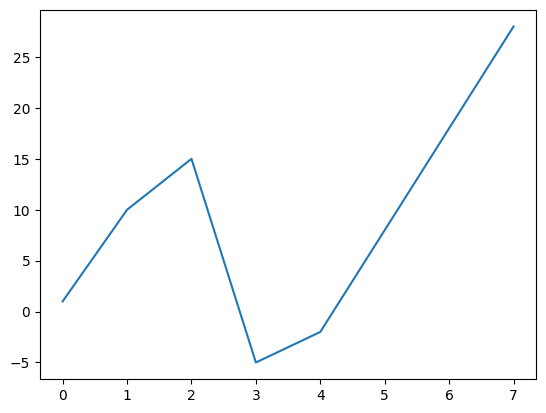

In [64]:
s.interpolate().plot()

###### The linear interpolation applies to missing values, regardless of the index.

In [65]:
np.random.seed(1234)
s.index = np.sort(np.random.randint(50,300,8))
s.interpolate()

88      1.0
97     10.0
103    15.0
166    -5.0
202    -2.0
254     8.0
261    18.0
299    28.0
dtype: float64

<AxesSubplot: >

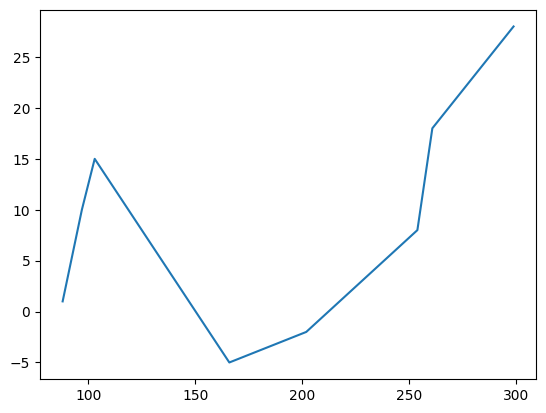

In [66]:
s.interpolate().plot()

##### 2. Interpolation related to the index: The index and time options in the method parameter allow interpolation to depend linearly on the index. This means that the interpolation will be a linear function of the index.

<AxesSubplot: >

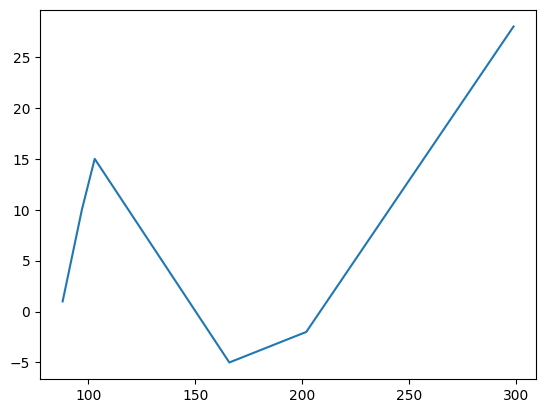

In [67]:
s.interpolate(method = 'index').plot()

In [68]:
s_t = pd.Series([0, np.nan, 10],
                index = [pd.Timestamp('2023-06-06'), pd.Timestamp('2023-06-19'), pd.Timestamp('2023-06-29')])
s_t

2023-06-06     0.0
2023-06-19     NaN
2023-06-29    10.0
dtype: float64

<AxesSubplot: >

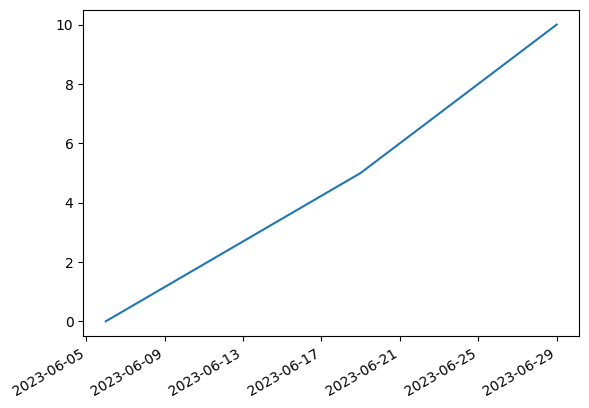

In [69]:
s_t.interpolate().plot()

<AxesSubplot: >

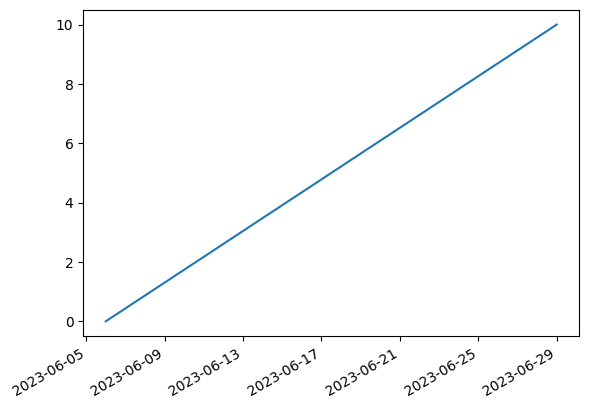

In [70]:
s_t.interpolate(method = "time").plot()

### Advanced interpolation methods 


Advanced interpolation methods refer to interpolation techniques that go beyond linear interpolation. These methods include spline interpolation, polynomial interpolation, Akima interpolation, and more. To use these advanced interpolation methods in Pandas, we would need to install the `SciPy` library, which provides implementations of these techniques.


<AxesSubplot: >

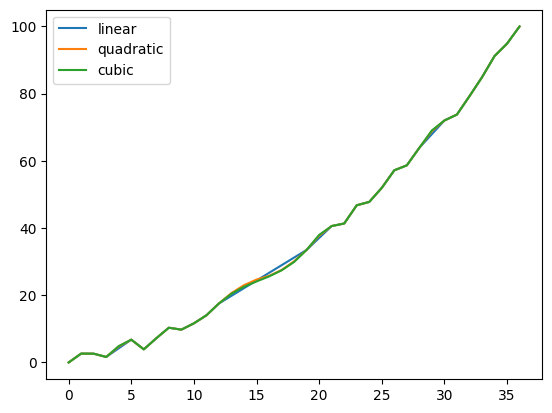

In [71]:
np.random.seed(123)
series = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
series[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: series.interpolate(method = m) for m in methods})
df.plot()

### Limits the number of missing values when using `interpolate()` method

The limit parameter in the interpolate() function specifies the maximum number of consecutive `NaN` values to be filled. It limits the number of consecutive missing values that can be interpolated.

By setting the limit parameter, we can control the extent to which interpolation is applied. Only a maximum of limit consecutive `NaN` values will be filled in a sequence, and any subsequent consecutive `NaN` values will remain as `NaN`.

In [72]:
s = pd.Series([1, np.nan, np.nan, np.nan, 5])
s.interpolate(limit = 2)

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

### `limit_direction` represents the direction of interpolate (forward,backward,both)

In [73]:
s = pd.Series([np.nan, np.nan, 1, np.nan , np.nan, np.nan, 5, np.nan, np.nan])
s.interpolate(limit_direction = 'backward')

0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

### `limit_area` 

The `limit_area` parameter in the `interpolate()` function represents the interpolation area. It specifies the area of the DataFrame where interpolation should be performed. The limit_area parameter can take the following values:

* `inside`: Only perform interpolation within the existing data range.
* `outside`: Perform extrapolation outside the existing data range.
* `None (default)`: Perform interpolation without restricting to a specific area.

In [74]:
s = pd.Series([np.nan, np.nan, 1, np.nan, np.nan, np.nan, 5, np.nan, np.nan])
s

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    NaN
8    NaN
dtype: float64

In [75]:
s.interpolate(limit_area = 'inside')

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

In [76]:
s.interpolate(limit_area = 'outside')

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    5.0
8    5.0
dtype: float64

## Replacing the missing values

In [77]:
index = pd.Series(data=["Tom", "Bob", "Mary", "James", "Andy", "Alice"], name="name")
data = {
    "age": [18, 30, None, 40, np.nan, 30],
    "city": ["Los Angeles", "New York", pd.NA, "DC", " ", "Seattle"],
    "sex": [None, "male", "female", "male", np.nan, "unknown"],
    "birth": [pd.Timestamp("2000-02-10"), pd.Timestamp("2001-12-12"), pd.NaT, pd.Timestamp("1978-08-08"), np.nan, pd.Timestamp("1988-10-17")]
}
user_info = pd.DataFrame(data, index=index)
user_info

,age,city,sex,birth
name,,,,
Tom,18.0,Los Angeles,None,2000-02-10
Bob,30.0,New York,male,2001-12-12
Mary,NaN,<NA>,female,NaT
James,40.0,DC,male,1978-08-08
Andy,NaN,,NaN,NaT
Alice,30.0,Seattle,unknown,1988-10-17


In [78]:
# Replace the age 40 with np.nan
user_info.age.replace(40, np.nan)

name
Tom      18.0
Bob      30.0
Mary      NaN
James     NaN
Andy      NaN
Alice    30.0
Name: age, dtype: float64

In [79]:
user_info.age.replace({40: np.nan}) # replace the age 40 with np.nan using a dictionary

name
Tom      18.0
Bob      30.0
Mary      NaN
James     NaN
Andy      NaN
Alice    30.0
Name: age, dtype: float64

In [80]:
user_info.replace({"age": 40, "birth": pd.Timestamp("1978-08-08")}, np.nan) # Multiple conditions with dictionary

,age,city,sex,birth
name,,,,
Tom,18.0,Los Angeles,None,2000-02-10
Bob,30.0,New York,male,2001-12-12
Mary,NaN,<NA>,female,NaT
James,NaN,DC,male,NaT
Andy,NaN,,NaN,NaT
Alice,30.0,Seattle,unknown,1988-10-17


In [81]:
user_info.sex.replace("unknown", np.nan)

name
Tom        None
Bob        male
Mary     female
James      male
Andy        NaN
Alice       NaN
Name: sex, dtype: object

In [82]:
user_info.city.replace(r'\s+', np.nan, regex = True)

name
Tom          NaN
Bob          NaN
Mary        <NA>
James         DC
Andy         NaN
Alice    Seattle
Name: city, dtype: object

# Summary

Due to the complexity and uncertainty of data sources, it is common to encounter missing values or incomplete fields in data. This notebook introduces how pandas handles missing values, including `None`, `np.nan`, `pd.NaT`, and `pd.NA`, which are all recognized as missing values. Specifically, `None` refers to missing values in *Python* object data type, `np.nan` represents missing values in numpy, and `pd.NaT` represents missing values in time data type. In Pandas 1.0 and later versions, an experimental scalar `pd.NA` is introduced to unify the representation and handling of missing values. The notebook also explains various methods to detect and handle missing values in pandas.